In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

kaggle.json is a file that i got from my kaggle account then manually uploaded it to the notbook

In [3]:
!cp /content/kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
100% 775M/775M [00:36<00:00, 24.1MB/s]
100% 775M/775M [00:36<00:00, 22.1MB/s]


In [ ]:
! unzip dog-and-cat-classification-dataset.zip

In [1]:
import os
import numpy as np
from PIL import Image
import cv2

def load_images_into_numpy(directory, target_size=(128, 128)):

  image_arrays = []
  try:
    for filename in os.listdir(directory):
      filepath = os.path.join(directory, filename)
      if os.path.isfile(filepath):
        try:
          img = Image.open(filepath).convert('RGB')
          img = img.resize(target_size)

          img_array = np.array(img)

          image_arrays.append(img_array)

        except (IOError, ValueError) as e:
          print(f"Error loading image {filename}: {e}")

  except FileNotFoundError:
    print(f"Directory not found: {directory}")
    return []

  return image_arrays



In [2]:
cats = load_images_into_numpy('/content/PetImages/Cat')
dogs = load_images_into_numpy('/content/PetImages/Dog')

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


(128, 128, 3)


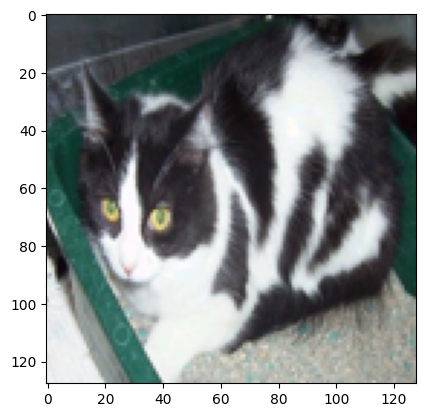

In [3]:
import matplotlib.pyplot as plt
plt.imshow(cats[0])
print(cats[0].shape)

In [4]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

train_set = np.array(cats[:8750] + dogs[:8750])
train_set = train_set.reshape(len(train_set), 128, 128, 3)
train_images = train_set.astype('float32') / 255
train_labels = np.array([0] * 8750 + [1] * 8750)

train_images, train_labels = shuffle(train_set, train_labels, random_state=42)

eval_set = np.array(cats[8750:11000] + dogs[8750:11000])
eval_set = eval_set.reshape(len(eval_set), 128, 128, 3)
eval_images = eval_set.astype('float32') / 255
eval_labels = np.array([0] * 2250 + [1] * 2250)

eval_images, eval_labels = shuffle(eval_set, eval_labels, random_state=42)

test_set = np.array(cats[11000:] + dogs[11000:])
test_set = test_set.reshape(len(test_set), 128, 128, 3)
test_images = test_set.astype('float32') / 255
test_labels = np.array([0] * 1499 + [1] * 1499)

test_images, test_labels = shuffle(test_set, test_labels, random_state=42)

In [5]:
from keras import models
from keras import layers
from keras import regularizers


In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0003)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.0003)))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras import callbacks

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

In [12]:
history = model.fit(train_images, train_labels,
                    validation_data=(eval_images, eval_labels),
                    epochs=35, batch_size=128,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.5417 - loss: 1.4277 - val_accuracy: 0.6767 - val_loss: 0.6119 - learning_rate: 0.0010
Epoch 2/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6846 - loss: 0.5952 - val_accuracy: 0.7178 - val_loss: 0.5500 - learning_rate: 0.0010
Epoch 3/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.7426 - loss: 0.5231 - val_accuracy: 0.7818 - val_loss: 0.4764 - learning_rate: 0.0010
Epoch 4/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.7978 - loss: 0.4520 - val_accuracy: 0.8002 - val_loss: 0.4575 - learning_rate: 0.0010
Epoch 5/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8144 - loss: 0.4187 - val_accuracy: 0.8224 - val_loss: 0.4048 - learning_rate: 0.0010
Epoch 6/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8527 - loss: 0.3473 - val_accuracy: 0.8251 - val_loss: 0.4006 - learning_rate: 0.0010
Epoch 7/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8724 - los

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8356 - loss: 0.3917


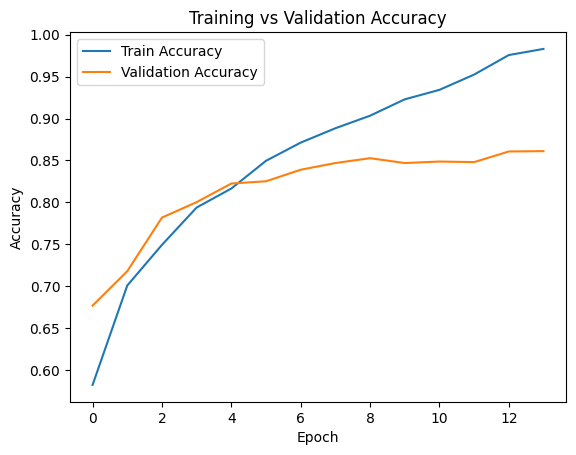

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # ✅ Now we have val_accuracy!
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [17]:
model.save('model.keras')

In [19]:
!pwd

/content
